In [1]:
import sys  
sys.path.insert(0, '/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro')

from humoro.trajectory import Trajectory

st = Trajectory()

st.loadTrajHDF5("/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/mogaze/p1_1_human_data.hdf5")

sub_traj = st.subTraj(3000,3360)

In [2]:
print(sub_traj.data.shape[0])

360


In [3]:
from humoro.player_pybullet import Player

pp = Player()

pp.spawnHuman("Human1")
pp.addPlaybackTraj(sub_traj, "Human1")

pp.play(duration=360, startframe=3000)

pybullet build time: Dec 10 2021 09:55:40


In [4]:
from humoro.kin_pybullet import HumanKin

kinematic = HumanKin()

In [5]:
baseTransY_id = kinematic.inv_index["baseTransY"]
print("baseTransY position Vec3:")
kinematic.get_position(baseTransY_id)

baseTransY position Vec3:


array([0., 0., 0.])

In [6]:
baseTransY_id = kinematic.inv_index["baseTransY"]
for i in range (sub_traj.data.shape[0]):
    kinematic.set_state(sub_traj,i)
    print(kinematic.get_position(baseTransY_id))    

[-0.68750328  0.32486463  0.        ]
[-0.6911481  0.3296909  0.       ]
[-0.7017296   0.34408772  0.        ]
[-0.70515913  0.3488667   0.        ]
[-0.70853186  0.35362753  0.        ]
[-0.71192116  0.35844317  0.        ]
[-0.71493143  0.36297539  0.        ]
[-0.71811646  0.36766741  0.        ]
[-0.72132587  0.37229329  0.        ]
[-0.72444695  0.3768464   0.        ]
[-0.73059678  0.38613066  0.        ]
[-0.73365855  0.39076728  0.        ]
[-0.73675328  0.39538929  0.        ]
[-0.7405529   0.40134773  0.        ]
[-0.75541109  0.42375332  0.        ]
[-0.75840753  0.42847273  0.        ]
[-0.76149839  0.43339095  0.        ]
[-0.7646541   0.43841705  0.        ]
[-0.77725726  0.45929042  0.        ]
[-0.78051251  0.4647634   0.        ]
[-0.78378803  0.47038522  0.        ]
[-0.78707325  0.47605345  0.        ]
[-0.79716885  0.49367434  0.        ]
[-0.80071276  0.49985638  0.        ]
[-0.80422229  0.50595504  0.        ]
[-0.80788004  0.51219535  0.        ]
[-0.81559223  0

In [7]:
sys.path.insert(0, '/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/examples/human_robot_trajopt')
import helpers

import numpy as np
from helpers import SDF

baseTransY_id = kinematic.inv_index["baseTransY"]
vector = np.array(kinematic.get_position(baseTransY_id))
matrix = np.zeros((sub_traj.data.shape[0],2))
print(vector)

print(matrix.shape)
#print(vector.data[0])
#print(vector.data[1])

#matrix[0,0] = vector.data[0]

for i in range(sub_traj.data.shape[0]):
    kinematic.set_state(sub_traj,i)
    vector = np.array(kinematic.get_position(baseTransY_id))
    for j in range(2):
        matrix[i,j] = vector.data[j]
        #matrix[i,j] = vector.data[j]*helpers.SDF.px_per_m        

min_X = 0;

for i in range(sub_traj.data.shape[0]):
    if(matrix[i][0] < min_X):
        min_X = matrix[i][0]

min_Y = 0;

for i in range(sub_traj.data.shape[0]):
    if(matrix[i][1] < min_Y):
        min_Y = matrix[i][1]

#print(matrix[0][i].min())  # -1.057856798171997    
print("--------")
print(min_X)  # -1.057856798171997

print("--------")
print(min_Y)  # -0.43058595061302185

for i in range(sub_traj.data.shape[0]):
    matrix[i][0] += (-1*min_X)
    matrix[i][1] += (-1*min_Y)
    
print(matrix.min()) # 0.0

min_X2 = 150;

for i in range(sub_traj.data.shape[0]):
    if(matrix[i][0] > min_X2):
        min_X2 = matrix[i][0]

min_Y2 = 150;

for i in range(sub_traj.data.shape[0]):
    if(matrix[i][1] > min_Y2):
        min_Y2 = matrix[i][1]

print("new mins")
print(min_X2) # 0.0
print(min_Y2) #0.0

print(matrix.shape)  
print(matrix)

for i in range(sub_traj.data.shape[0]):
    #for j in range(2):
        #matrix[i,j] *= helpers.SDF.px_per_m 
    matrix[i,:] = helpers.SDF.m_to_pix(matrix[i,:])

print("after the pixel world")
print(matrix)

for i in range(sub_traj.data.shape[0]):
    for j in range(2):
        matrix[i,j] = int(matrix[i,j])
                        
print("after int() for index")
print(matrix)

[-0.13289224  2.05464721  0.        ]
(360, 2)
--------
-0.9445357322692871
--------
0
0.0
new mins
150
150
(360, 2)
[[2.57032454e-01 3.24864626e-01]
 [2.53387630e-01 3.29690903e-01]
 [2.42806137e-01 3.44087720e-01]
 [2.39376605e-01 3.48866701e-01]
 [2.36003876e-01 3.53627533e-01]
 [2.32614577e-01 3.58443171e-01]
 [2.29604304e-01 3.62975389e-01]
 [2.26419270e-01 3.67667407e-01]
 [2.23209858e-01 3.72293293e-01]
 [2.20088780e-01 3.76846403e-01]
 [2.13938951e-01 3.86130661e-01]
 [2.10877180e-01 3.90767276e-01]
 [2.07782447e-01 3.95389289e-01]
 [2.03982830e-01 4.01347727e-01]
 [1.89124644e-01 4.23753321e-01]
 [1.86128199e-01 4.28472728e-01]
 [1.83037341e-01 4.33390945e-01]
 [1.79881632e-01 4.38417047e-01]
 [1.67278469e-01 4.59290415e-01]
 [1.64023221e-01 4.64763403e-01]
 [1.60747707e-01 4.70385224e-01]
 [1.57462478e-01 4.76053447e-01]
 [1.47366881e-01 4.93674338e-01]
 [1.43822968e-01 4.99856383e-01]
 [1.40313447e-01 5.05955040e-01]
 [1.36655688e-01 5.12195349e-01]
 [1.28943503e-01 5.250157

150.0
110.0


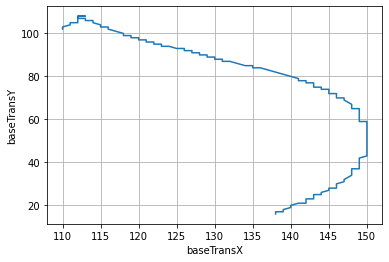

In [8]:
import numpy as np
import matplotlib.pyplot as plt

baseTransX = [row[0] for row in matrix]
baseTransY = [row[1] for row in matrix]

x = baseTransX

for i in range(len(baseTransX)):
    baseTransX[i] = 150 - baseTransX[i]
    
print(max(baseTransX))
print(min(baseTransX))

y = baseTransY

plt.xlabel('baseTransX') 
plt.ylabel('baseTransY') 

plt.plot(x, y)
plt.grid()
plt.show()

In [2]:
from humoro.load_scenes import autoload_objects

obj_trajs, obj_names = autoload_objects(pp, "/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/mogaze/p1_1_object_data.hdf5", "/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/mogaze/scene.xml")

pp.play(duration=360, startframe=3000)
img = pp.getFrame2d(3100)

print(type(img)) 
plt.grid()
plt.imshow(img)

ModuleNotFoundError: No module named 'humoro.load_scenes'

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(360, 2)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


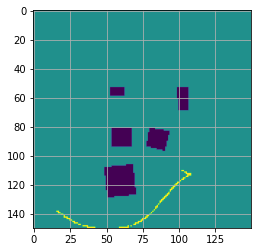

In [50]:
print(img)

#imgWithTraj = img

#print(imgWithTraj)

print(matrix.shape)

for i in range(sub_traj.data.shape[0]):
    j = 0
    #x = int(matrix[i, j])
    #y = int(matrix[i, j+1])
    x = int(baseTransX[i])
    y = int(baseTransY[i])
    if(y == 150 or x == 150):
        continue
    img[x, y] = 2

print(img)
plt.grid()
plt.imshow(img)